In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [2]:
#get the dataset
testpath = 'C:/Users/saisv/Documents/cardiovascular/cardiovascular/ecg dataset/test'
trainpath = 'C:/Users/saisv/Documents/cardiovascular/cardiovascular/ecg dataset/train'

In [3]:
code = {'N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4, 'M':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    #return the name of categories

In [4]:
import cv2
count=0
for folder in  os.listdir(testpath ) : #go on seg_test path
    loc=os.path.join(testpath,folder)
    for i in loc:
        loc=os.path.join(loc,i)
        img=cv2.imread(loc)
        count=count+1
    print(f'For training data , found {count} in folder {folder}')#print length for each class

For training data , found 130 in folder ECG Images of Myocardial Infarction Patients (240x12=2880)
For training data , found 266 in folder ECG Images of Patient that have abnormal heartbeat (233x12=2796)
For training data , found 397 in folder ECG Images of Patient that have History of MI (172x12=2064)
For training data , found 507 in folder Normal Person ECG Images (284x12=3408)


In [5]:
for folder in  os.listdir(trainpath ) : #go on seg_test path
    loc=os.path.join(trainpath,folder)
    for i in loc:
        loc=os.path.join(loc,i)
        img=cv2.imread(loc)
        count=count+1
    print(f'For training data , found {count} in folder {folder}')#print length for each class

For training data , found 638 in folder ECG Images of Myocardial Infarction Patients (240x12=2880)
For training data , found 775 in folder ECG Images of Patient that have abnormal heartbeat (233x12=2796)
For training data , found 907 in folder ECG Images of Patient that have History of MI (172x12=2064)
For training data , found 1018 in folder Normal Person ECG Images (284x12=3408)


In [6]:
import matplotlib.pyplot as plt
size = []
for folder in  os.listdir(trainpath ) : 
    loc=os.path.join(trainpath,folder)
    for i in os.listdir(loc):
        path=os.path.join(loc,i)
        img=cv2.imread(path)
        size.append(img.shape)#get the size of all image in size
pd.Series(size).value_counts()#count number of image have same shape

(1572, 2213, 3)    928
dtype: int64

In [7]:
import matplotlib.pyplot as plt
size = []
for folder in  os.listdir(testpath ) : 
    loc=os.path.join(testpath,folder)
    for i in os.listdir(loc):
        path=os.path.join(loc,i)
        img=cv2.imread(path)
        size.append(img.shape)#get the size of all image in size
pd.Series(size).value_counts()#count number of image have same shape

(1572, 2213, 3)    448
dtype: int64

In [8]:
fol=0
s = 100
X_train = []
y_train = []
for folder in  os.listdir(trainpath ) : 
    loc=os.path.join(trainpath,folder)
    for i in os.listdir(loc):
        if(folder=='abnormal_heartbeat'):
            fol='0'
        elif(folder=='History_of_MI'):
            fol='1'
        elif(folder=='Myocardial'):
            fol='2'
        elif(folder=='Normal_Person'):
            fol='3'
        path=os.path.join(loc,i)
        img=cv2.imread(path)
        image_array = cv2.resize(img , (s,s))#resize all images to 100*100
        X_train.append(list(image_array))#list all images after resize in x_train
        y_train.append(fol)#get the names of images from code function

In [9]:
print(f'we have {len(X_train)} items in X_train')
print(f'we have {len(y_train)} items in Y_train')

we have 928 items in X_train
we have 928 items in Y_train


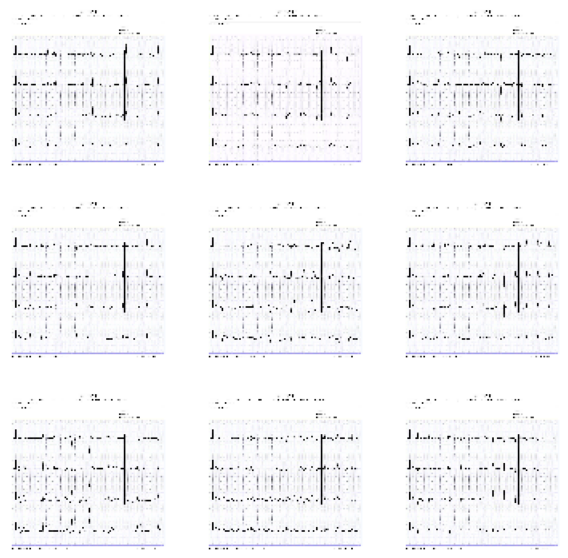

In [10]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),9))) : #print random images
    plt.subplot(3,3,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')


In [11]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : #go on seg_train path
    loc=os.path.join(testpath,folder)
    for i in os.listdir(loc):
        if(folder=='abnormal_heartbeat'):
            fol='0'
        elif(folder=='History_of_MI'):
            fol='1'
        elif(folder=='Myocardial'):
            fol='2'
        elif(folder=='Normal_Person'):
            fol='3'
        path=os.path.join(loc,i)
        img=cv2.imread(path)
        image_array = cv2.resize(img , (s,s))#resize all images to 100*100
        X_test.append(list(image_array))#list all images after resize in x_train
        y_test.append(fol)#get the names of images from code function

we have 448 items in X_test


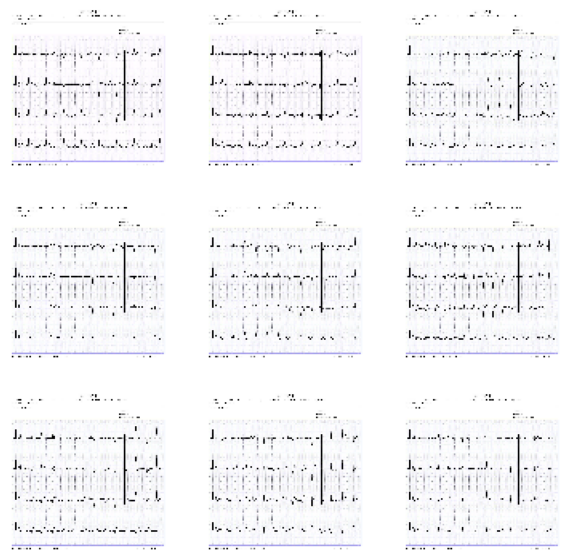

In [12]:
print(f'we have {len(X_test)} items in X_test')
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_test),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')

In [13]:
X_train = np.array(X_train)#get train ,test and pred arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (928, 100, 100, 3)
X_test shape  is (448, 100, 100, 3)
y_train shape  is (928,)
y_test shape  is (448,)


In [14]:
KerasModel = keras.models.Sequential([#bulid nn
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        #1 convolutional layer 200filter each filter 3*3 relu  input 100*100*3 rgb
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
       #2 convolutional layer 150filter each filter 3*3 relu
        keras.layers.MaxPool2D(4,4),
        #3 maxpool layer 4*4
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        #4 convolutional layer 120filter each filter 3*3 relu
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'), 
        #5 convolutional layer 80filter each filter 3*3 relu
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        #6 convolutional layer 50filter each filter 3*3 relu
        keras.layers.MaxPool2D(4,4),#7 maxpool layer 4*4
        keras.layers.Flatten(),  #make the matrix flate
        keras.layers.Dense(120,activation='relu') , #hidden layer (120cell)   
        keras.layers.Dense(100,activation='relu') , #hidden layer (100cell)
        keras.layers.Dense(50,activation='relu') ,  #hidden layer (50cell)      
        keras.layers.Dropout(rate=0.5) , 
        #drop some nuron 50% reduces the number of connections to increase speed and reduces the overfit
        keras.layers.Dense(6,activation='softmax') ,  #output layer 6  
    ])

In [15]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#gradient descent to get the global optimization ,cost function(multi classification),begin accuracy

In [16]:
print('Model Details are : ')
print(KerasModel.summary())#calc num of paramter

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                   

In [17]:
epochs = 10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)#traning
#batch size =num of images for each one

Epoch 1/10
15/15 [==============================] - 86s 6s/step - loss: 4.1706 - accuracy: 0.7963
Epoch 2/10
15/15 [==============================] - 85s 6s/step - loss: 0.0897 - accuracy: 0.9871
Epoch 3/10
15/15 [==============================] - 90s 6s/step - loss: 0.0249 - accuracy: 0.9946
Epoch 4/10
15/15 [==============================] - 101s 7s/step - loss: 0.0068 - accuracy: 0.9978
Epoch 5/10
15/15 [==============================] - 1338s 7s/step - loss: 0.0119 - accuracy: 0.9968
Epoch 6/10
15/15 [==============================] - 86s 6s/step - loss: 0.0032 - accuracy: 0.9989
Epoch 7/10
15/15 [==============================] - 85s 6s/step - loss: 2.7403e-04 - accuracy: 1.0000
Epoch 8/10
15/15 [==============================] - 88s 6s/step - loss: 0.0132 - accuracy: 0.9978
Epoch 9/10
15/15 [==============================] - 89s 6s/step - loss: 0.0238 - accuracy: 0.9935
Epoch 10/10
15/15 [==============================] - 97s 6s/step - loss: 0.0082 - accuracy: 0.9968


In [18]:
KerasModel.save(r"C:\Users\saisv\Documents\cardiovascular\cardiovascular\model1.h5")

In [19]:
y_pred = KerasModel.predict(X_test)

14/14 [==============================] - 16s 980ms/step


In [20]:
test_loss, test_acc = KerasModel.evaluate(X_test,  y_test, verbose=2)
print("test accuracy is: ",test_acc*100,"%")
     

14/14 - 20s - loss: 0.0000e+00 - accuracy: 1.0000 - 20s/epoch - 1s/step
test accuracy is:  100.0 %


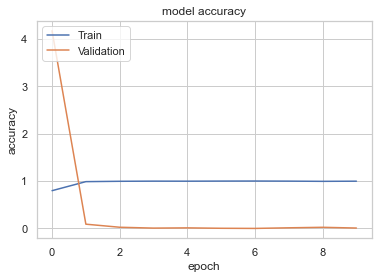

In [21]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()